In [24]:
import numpy as np
M=500
L=10
tfin=5
Dt=tfin/M

In [25]:
Pi=3.14
def f_initial(x,y):
    return np.sin(np.pi*x/L)*np.sin(2*np.pi*y/L)

def r_initial(x,y):
  return (np.pi/L)*np.cos(np.pi*x/L)*np.sin(2*np.pi*y/L)

def p_initial(x,y):
    return 2*np.pi/L*np.sin(np.pi*x/L)*np.cos(2*np.pi*y/L)

In [54]:
def resetInitialMatrix():
    global u
    global r,s,p
    u=np.zeros((N,N,M))
    r=np.zeros((N,N,M))
    s=np.zeros((N,N,M))
    p=np.zeros((N,N,M))

    #s condizione iniziale gia corretta

    for jx in range(0,N):
        for jy in range(0,N):
            x=jx*h
            y=jy*h
            u[jx,jy,0]=f_initial(x,y)

            r[jx,jy,0]=r_initial(x,y)
            p[jx,jy,0]=p_initial(x,y)


In [27]:
def u_exact(x,y,t):
    return np.sin(np.pi*x/L)*np.sin(2*np.pi*y/L)*np.cos(np.sqrt(5)*np.pi*t/L)

def s_exact(x,y,t):
    return -np.sin(np.pi*x/L)*np.sin(2*np.pi*y/L)*np.sin(np.sqrt(5)*np.pi*t/L)*np.sqrt(5)*np.pi/L

In [28]:
#Lax-Friedrichs
def laxfried():
    for n in range(0,M-1):
        for i in range(0,N-1):
            for j in range(0,N-1):
                
                #FORMULA
                s[i,j,n+1]=0.25*(s[i+1,j,n]+s[i-1,j,n]+s[i,j+1,n]+s[i,j-1,n])-alpha*0.5*(r[i+1,j,n]-r[i-1,j,n])-alpha*0.5*(p[i,j+1,n]-p[i,j-1,n])
                
                ##boundary condition s(0,L)=0
                if (i==0 or i==N-1) or (j==0 or j==N-1):
                    s[i,j,n+1]=0

                r[i,j,n+1]=0.25*(r[i+1,j,n]+r[i-1,j,n]+r[i,j+1,n]+r[i,j-1,n])-alpha*0.5*(s[i+1,j,n]-s[i-1,j,n])
                p[i,j,n+1]=0.25*(p[i+1,j,n]+p[i-1,j,n]+p[i,j+1,n]+p[i,j-1,n])-alpha*0.5*(s[i,j+1,n]-s[i,j-1,n])


                


In [55]:
N=100
h=L/N
zeros=np.zeros((N,N,M))
resetInitialMatrix()
vx=1/np.sqrt(2)
vy=1/np.sqrt(2)
alpha=-1*Dt/h

#trovo r,s,p
laxfried()

#adesso che ce li ho, 

In [30]:
def error(t):
    partial=0
    for i in range(0,N):
        xi=i*L/N
        n=t/Dt-1
        partial+=abs(u[i,int(n)]-u_exact(xi,t))
        #print('x_i='+str(xi)+' mia='+str(u[i,int(n)])+' esatta='+str(u_exact(xi,t)))
    return partial/N

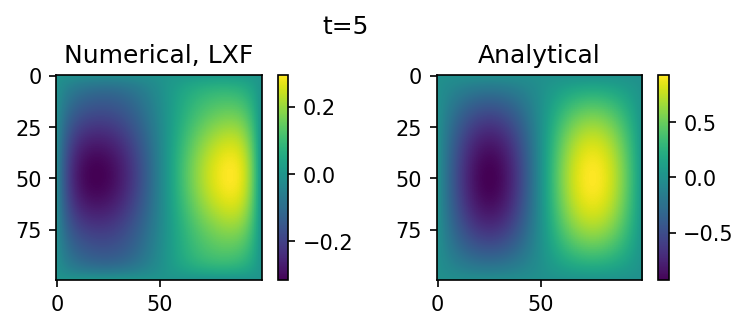

In [68]:
import matplotlib
import matplotlib.pyplot as plt

t1_index=1/Dt
t3_index=3/Dt
t5_index=5/Dt-1
plt.figure(dpi=150)
plt.suptitle('t=5')

plt.subplot(2, 2, 1)
plt.title('Numerical, LXF')
plt.imshow(u[:,:,int(t5_index)])
plt.colorbar()

plt.subplot(2, 2, 2)
plt.title('Analytical')
esatta1=np.fromfunction(lambda i, j: u_exact(i*h,j*h,5),(N,N))
plt.imshow(esatta1)

plt.colorbar()
plt.show()
#plt.subplot(2, 2, 2)
#plt.title('t=3')
#plt.imshow(u[:,:,int(t3_index)])
#plt.colorbar()

#plt.subplot(2, 2, 3)
#plt.title('t=5')
#plt.imshow(u[:,:,int(t5_index)])

#plt.colorbar()


In [59]:
for n in range(0,M-1):
    for i in range(0,N-1):
        for j in range(0,N-1):
            u[i,j,n+1]=0.25*(u[i+1,j,n]+u[i-1,j,n]+u[i,j+1,n]+u[i,j-1,n])+s[i,j,n]*Dt


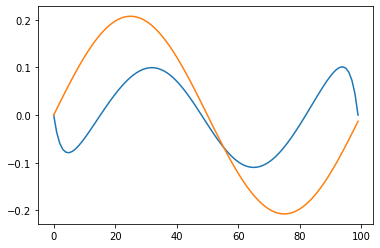

In [52]:
import matplotlib
import matplotlib.pyplot as plt
t_eval=4.9
plt.plot(s[int(5.2/h),:,int(t_eval/Dt)])
esattaS=np.fromfunction(lambda i, j,k: s_exact(i*h,j*h,k*Dt),(N,N,M))
plt.plot(esattaS[int(5.2/h),:,int(t_eval/Dt)])

plt.show()